请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 

In [9]:
import pandas as pd

# 加载数据集
df = pd.read_csv('C:\\Users\\33079\PycharmProjects\pys\ddd\steam-games.csv')
font = 'C:\\Users\\33079\PycharmProjects\pys\ddd\simhei.ttf'
# 查看前几行数据以确认数据加载正确
print(df.head())

# 基本的数据处理
# 转换价格和评分为数值类型
df['original_price'] = pd.to_numeric(df['original_price'], errors='coerce')
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['overall_review_%'] = pd.to_numeric(df['overall_review_%'], errors='coerce')
df['recent_review_%'] = pd.to_numeric(df['recent_review_%'], errors='coerce')

# 去除NaN值
df = df.dropna(subset=['original_price', 'discounted_price', 'overall_review_%', 'recent_review_%'])

# 数据分析示例：计算平均折扣率
average_discount = (df['original_price'] - df['discounted_price']) / df['original_price'] * 100
print(f'平均折扣率: {average_discount.mean()}%')

# 更多的数据分析和可视化代码可以根据您的具体需求添加


    app_id                             title  release_date  \
0      730                  Counter-Strike 2  21 Aug, 2012   
1      570                            Dota 2   9 Jul, 2013   
2  2215430  Ghost of Tsushima DIRECTOR'S CUT  16 May, 2024   
3  1245620                        ELDEN RING  24 Feb, 2022   
4  1085660                         Destiny 2   1 Oct, 2019   

                            genres  \
0             Action, Free to Play   
1   Action, Strategy, Free to Play   
2                Action, Adventure   
3                      Action, RPG   
4  Action, Adventure, Free to Play   

                                          categories  \
0  Cross-Platform Multiplayer, Steam Trading Card...   
1  Steam Trading Cards, Steam Workshop, SteamVR C...   
2  Single-player, Online Co-op, Steam Achievement...   
3  Single-player, Online PvP, Online Co-op, Steam...   
4  Single-player, Online PvP, Online Co-op, Steam...   

                  developer           publisher original_pric

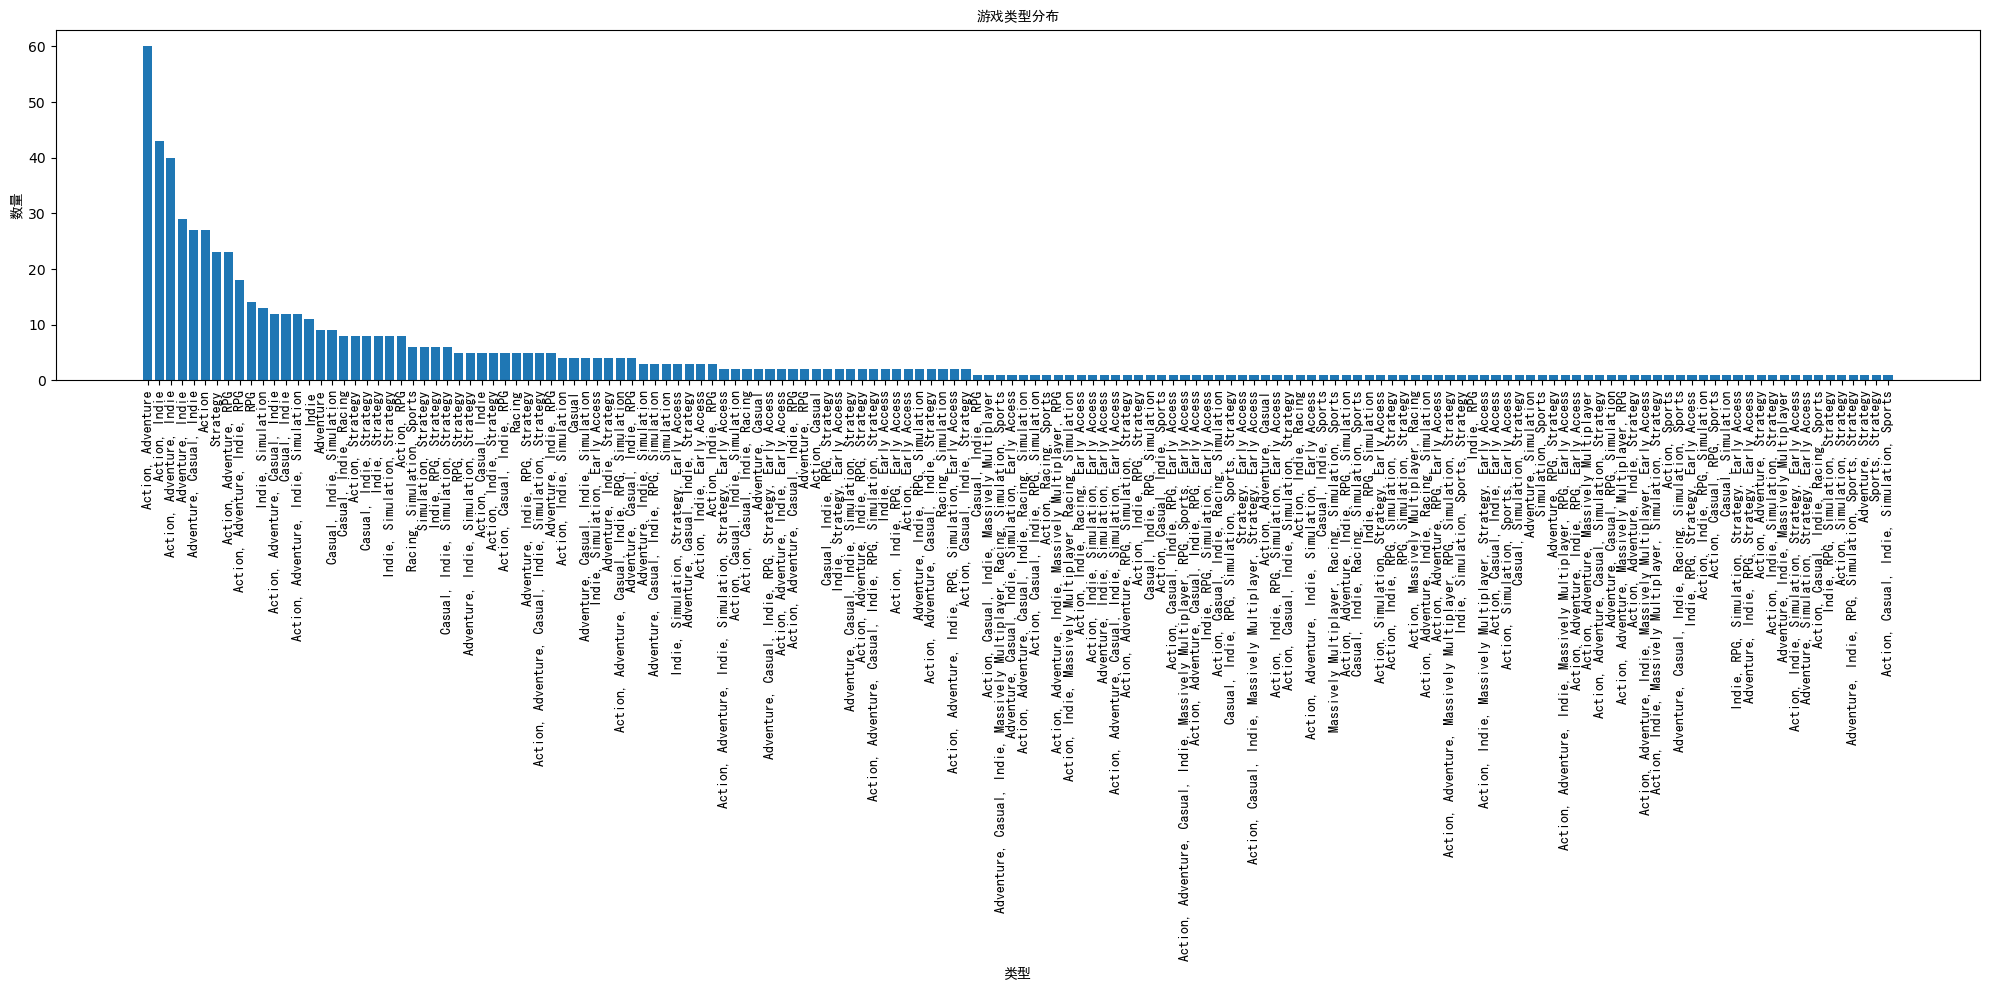

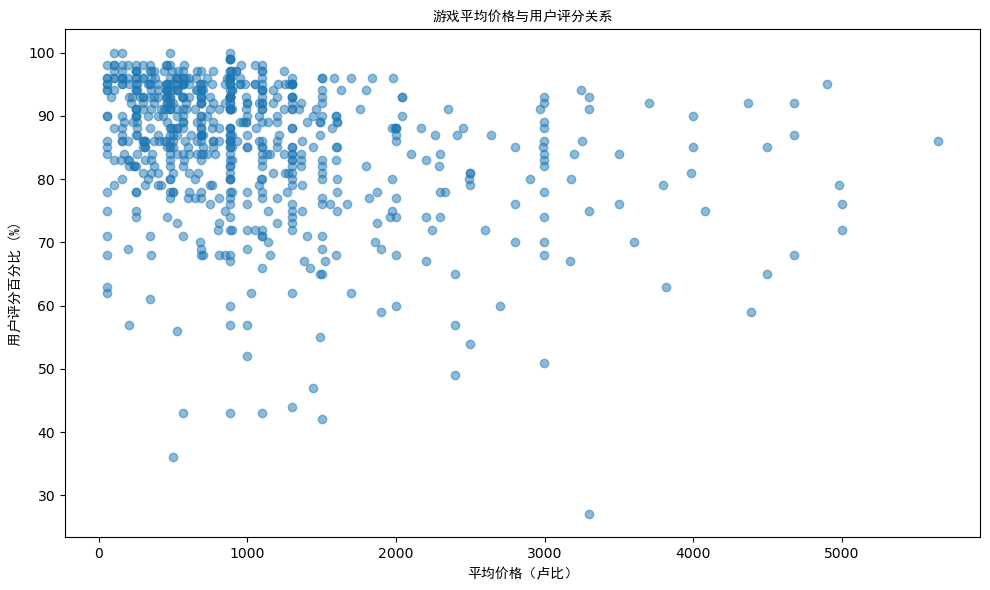

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 加载数据集
df = pd.read_csv('C:\\Users\\33079\\PycharmProjects\\pys\\ddd\\steam-games.csv')

# 数据清洗：转换价格为数值类型，并处理NaN值
# 将'Free'替换为0以便于计算
df['original_price'] = df['original_price'].replace('Free', '0')
df['discounted_price'] = df['discounted_price'].replace('Free', '0')

# 去除印度卢比符号并转换为数值类型
df['original_price'] = pd.to_numeric(df['original_price'].str.replace('₹', '', regex=True).replace(',', '', regex=True), errors='coerce')
df['discounted_price'] = pd.to_numeric(df['discounted_price'].str.replace('₹', '', regex=True).replace(',', '', regex=True), errors='coerce')

# 由于overall_review_%已经是数值类型，直接转换为数值类型
df['overall_review_%'] = pd.to_numeric(df['overall_review_%'], errors='coerce')

# 对于recent_review_%列，如果它是字符串类型，去除百分号后转换为数值类型
if pd.api.types.is_string_dtype(df['recent_review_%']):
    df['recent_review_%'] = pd.to_numeric(df['recent_review_%'].str.rstrip('%'), errors='coerce')
else:
    df['recent_review_%'] = pd.to_numeric(df['recent_review_%'], errors='coerce')

# 去除NaN值
df.dropna(subset=['original_price', 'discounted_price', 'overall_review_%', 'recent_review_%'], inplace=True)

# 设置中文字体
font_path = 'C:\\Users\\33079\PycharmProjects\pys\ddd\simhei.ttf'  # 根据你的实际字体路径进行调整
font_prop = fm.FontProperties(fname=font_path)

# 游戏类型分布
genre_counts = df['genres'].value_counts()
plt.figure(figsize=(20, 10))
plt.bar(genre_counts.index, genre_counts.values)
plt.xticks(rotation=90, fontproperties=font_prop)
plt.title('游戏类型分布', fontproperties=font_prop)
plt.xlabel('类型', fontproperties=font_prop)
plt.ylabel('数量', fontproperties=font_prop)
plt.tight_layout()  # 调整布局以防止标签重叠
plt.show()

# 平均价格与评分关系
plt.figure(figsize=(10, 6))
plt.scatter(df['original_price'], df['overall_review_%'], alpha=0.5)
plt.title('游戏平均价格与用户评分关系', fontproperties=font_prop)
plt.xlabel('平均价格（卢比）', fontproperties=font_prop)
plt.ylabel('用户评分百分比 (%)', fontproperties=font_prop)
plt.tight_layout()
plt.show()


In [14]:
import pandas as pd



linux_games = df[df['linux_support'] == True]


num_linux_games = linux_games.shape[0]

avg_rating_linux_games = linux_games['overall_review_%'].mean()

print("支持linux的游戏数量", num_linux_games)
print("平均值为", avg_rating_linux_games)


支持linux的游戏数量 135
平均值为 90.11111111111111


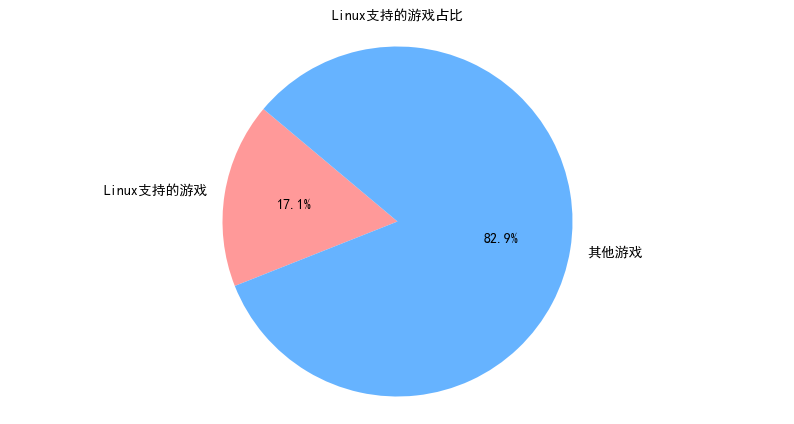

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 加载数据集
df = pd.read_csv('C:\\Users\\33079\\PycharmProjects\\pys\\ddd\\steam-games.csv')

# 设置中文字体
font_path = 'C:\\Users\\33079\\PycharmProjects\\pys\\ddd\\simhei.ttf'
font_prop = fm.FontProperties(fname=font_path)

# 筛选支持Linux的游戏
linux_games = df[df['linux_support'] == True]

# 计算支持Linux的游戏数量
num_linux_games = linux_games.shape[0]

# 设置标签和大小
labels = ['Linux支持的游戏', '其他游戏']
sizes = [num_linux_games, df.shape[0] - num_linux_games]

# 创建一个饼图，显示Linux支持的游戏与非Linux支持的游戏的比例
plt.figure(figsize=(10, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'], textprops={'fontproperties': font_prop})
plt.axis('equal')
plt.title('Linux支持的游戏占比', fontproperties=font_prop)

# 显示图表
plt.show()


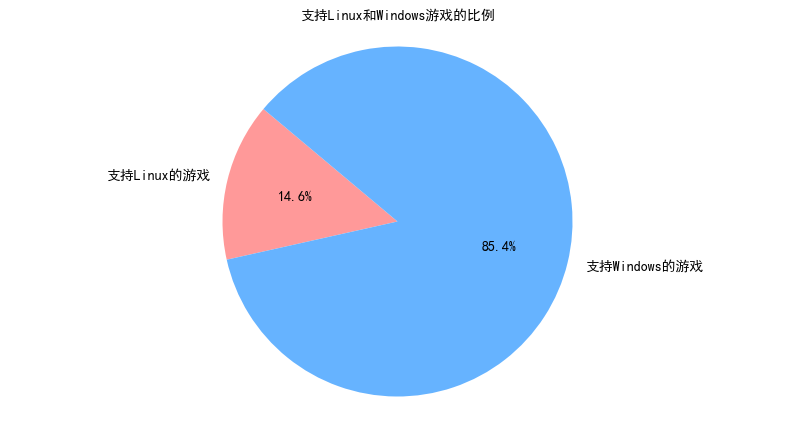

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 加载数据集
df = pd.read_csv('C:\\Users\\33079\\PycharmProjects\\pys\\ddd\\steam-games.csv')

# 设置中文字体
font_path = 'C:\\Users\\33079\\PycharmProjects\\pys\\ddd\\simhei.ttf'
font_prop = fm.FontProperties(fname=font_path)

# 筛选支持Linux和Windows的游戏
linux_games = df[df['linux_support'] == True]
windows_games = df[df['win_support'] == True]

# 计算支持Linux和Windows的游戏数量
num_linux_games = linux_games.shape[0]
num_windows_games = windows_games.shape[0]

# 用于可视化的数据
labels = ['支持Linux的游戏', '支持Windows的游戏']
sizes = [num_linux_games, num_windows_games]

# 绘制Linux和Windows支持游戏的比例
plt.figure(figsize=(10, 5))

# 饼图显示Linux和Windows支持游戏的比例
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'], textprops={'fontproperties': font_prop})
plt.axis('equal')
plt.title('支持Linux和Windows游戏的比例', fontproperties=font_prop)

plt.show()


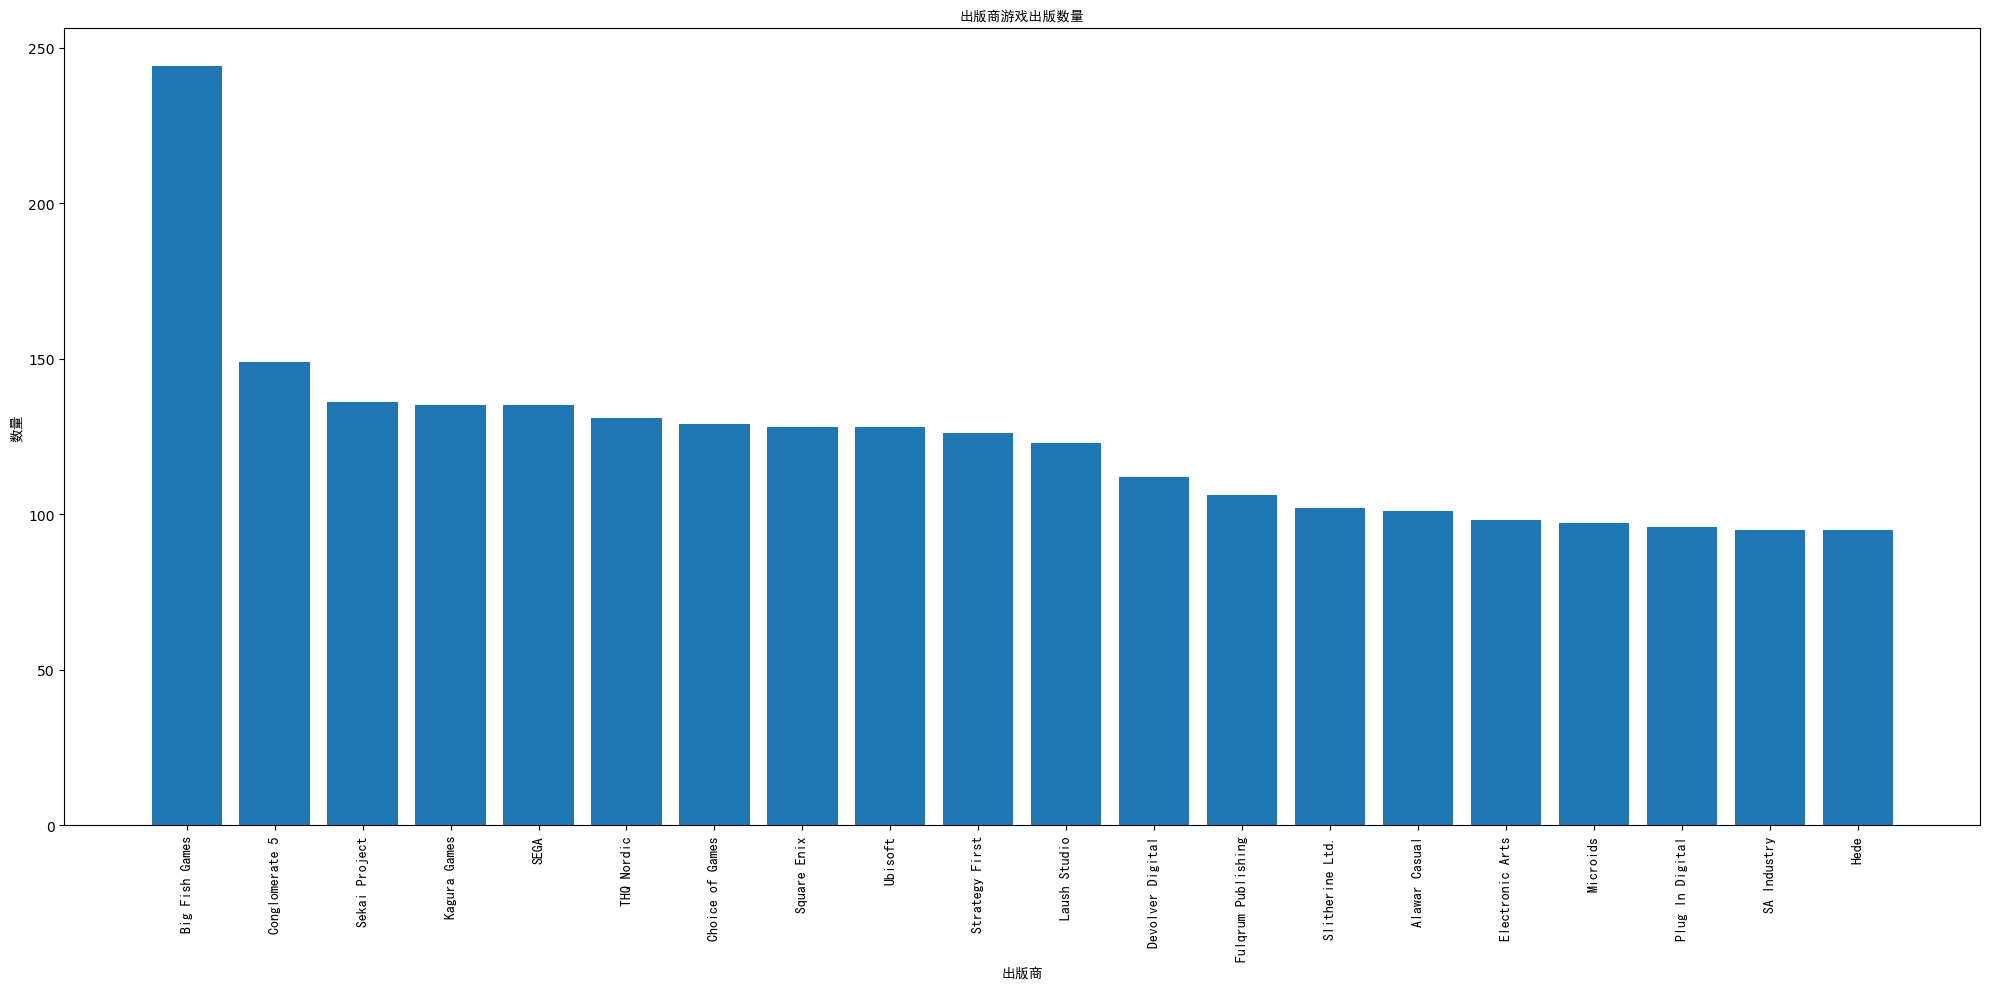

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 加载CSV文件


# 设置中文字体
font_path = 'C:\\Users\\33079\\PycharmProjects\\pys\\ddd\\simhei.ttf'  # 根据你的实际字体路径进行调整
font_prop = fm.FontProperties(fname=font_path)

# 出版商游戏出版数量
publisher_counts = df['publisher'].value_counts()

plt.figure(figsize=(20, 10))
plt.bar(publisher_counts.index[:20], publisher_counts.values[:20])  # 只显示前20个出版商
plt.xticks(rotation=90, fontproperties=font_prop)
plt.title('出版商游戏出版数量', fontproperties=font_prop)
plt.xlabel('出版商', fontproperties=font_prop)
plt.ylabel('数量', fontproperties=font_prop)
plt.tight_layout()  # 调整布局以防止标签重叠
plt.show()


In [5]:
import pandas as pd



# 获取最晚发布的10个游戏
latest_games = df.sort_values(by='release_date', ascending=False).head(10)

# 显示相关的列
latest_games_display = latest_games[['title', 'release_date', 'publisher']]
print(latest_games_display)


                                        title     release_date  \
41199                 Hollow Knight: Silksong  To be announced   
39626                                   Sleep         Sep 2020   
37858                                 Malkyrs         Sep 2019   
34833                       Skull Ball Heroes         Sep 2016   
34497             Super Chain Crusher Horizon         Sep 2014   
16427                                   Pacer         Oct 2020   
25918                              Apparition         Oct 2018   
6410   Age of Wonders II: The Wizard's Throne         Oct 2010   
9178                           Age of Wonders         Oct 2010   
6826              Age of Wonders Shadow Magic         Oct 2010   

                              publisher  
41199                       Team Cherry  
39626                       Black apple  
37858                    Malkyrs Studio  
34833  Strength in Numbers Studios, Inc  
34497                 Mindware Co.,Ltd.  
16427                